# Problem 12

Now analyze an excerpt of a large-scale RNAseq experiment consisting of four technical repeats and normalize the data using various approaches:

**A** Read the data file and make suitable plots to visualize the four different samples (recommended R commands: `read.table, boxplot`). Describe the data and comment on the need for normalization.

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
from scipy import stats
plt.style.use('seaborn')
mpl.rcParams['figure.figsize'] = 16, 9
mpl.rcParams['figure.dpi'] = 150

data12 = pd.read_csv('Fly_RNA_dataset.csv', sep='\t')

In [2]:
# remove zero only rows
data12 = data12[(data12.T != 0).any()]

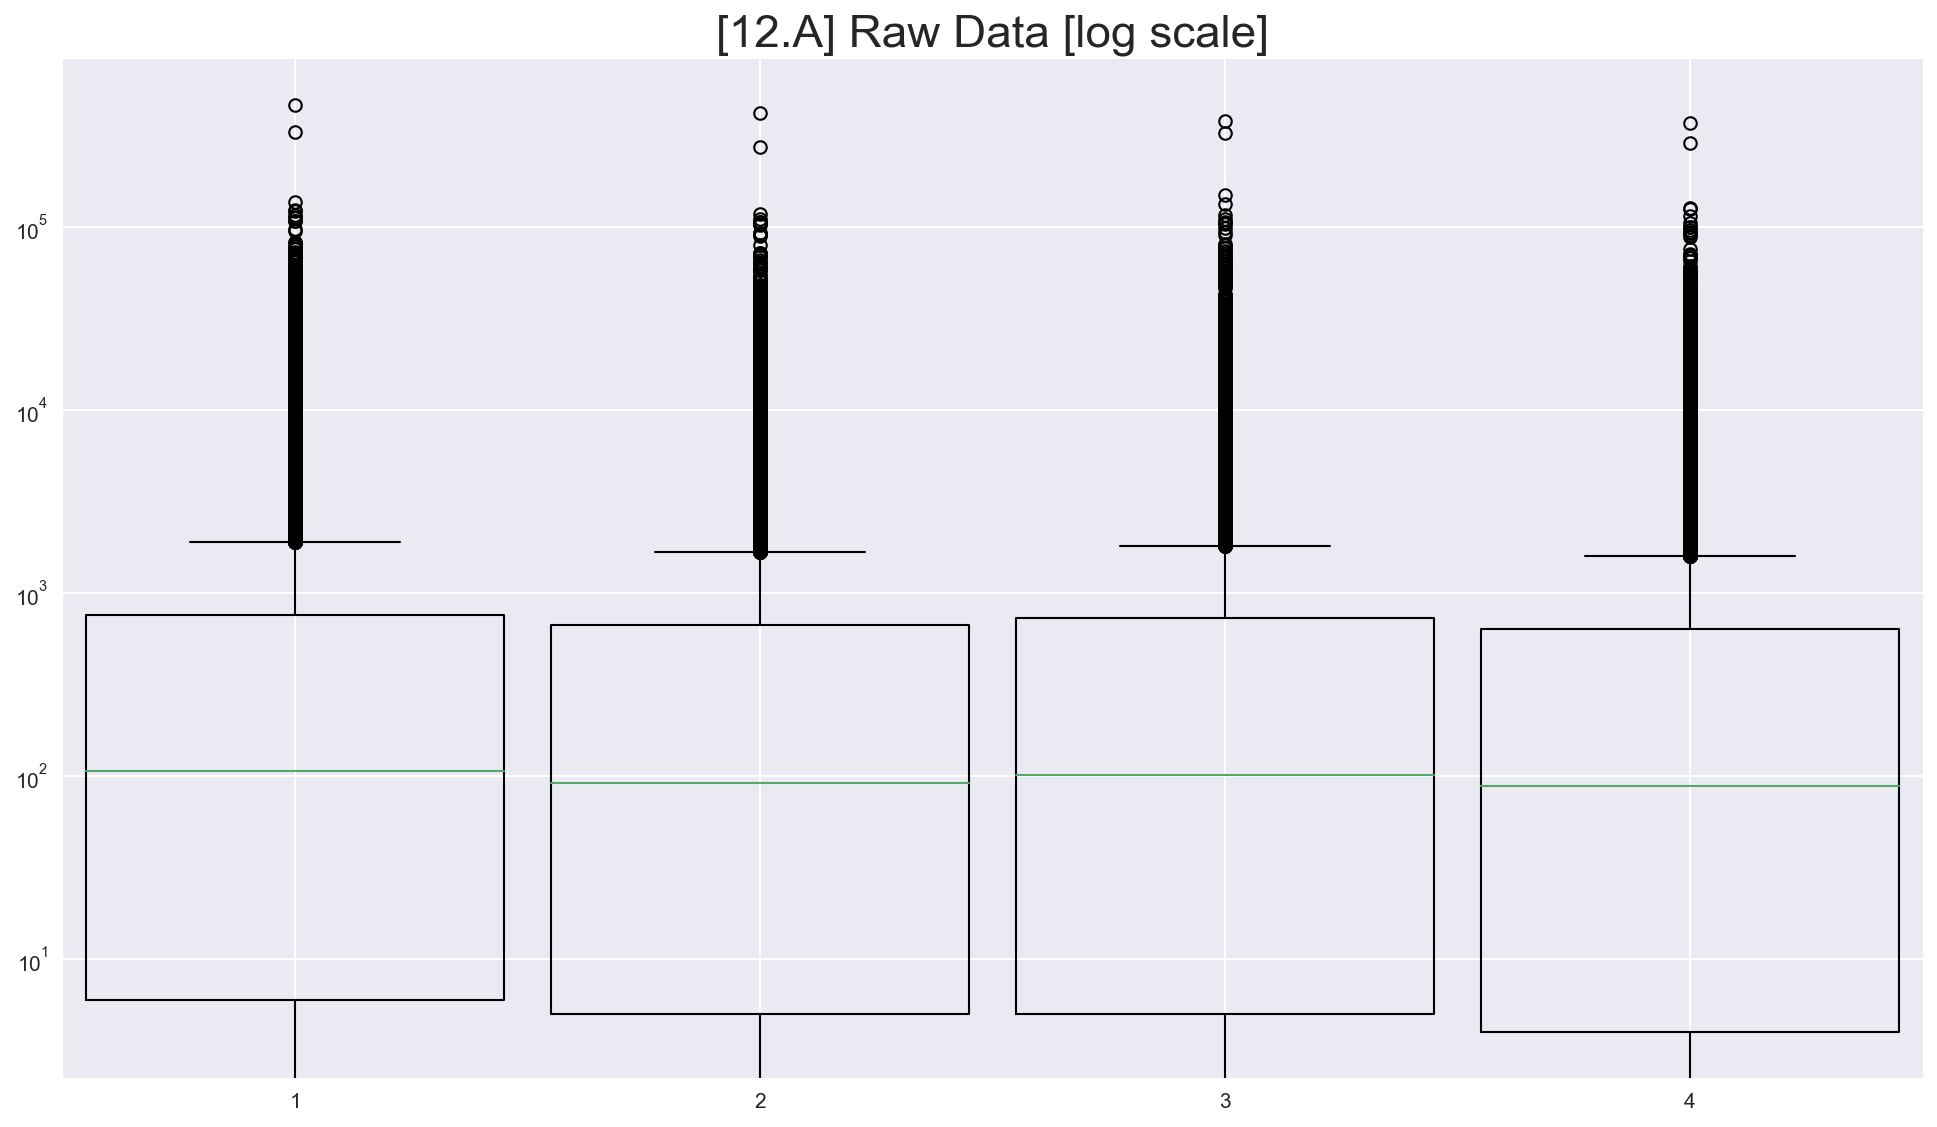

In [3]:
fig, ax = plt.subplots()
ax.set_yscale('log')
plt.boxplot([data12.A1, data12.A2, data12.B1, data12.B2], positions = [1, 2, 3, 4], widths=[0.9, 0.9, 0.9, 0.9])
plt.title("[12.A] Raw Data [log scale]", fontsize=22)
plt.show()

**B** Apply the sum total normalization, make appropriate plots and comment on the quality and appropriateness.

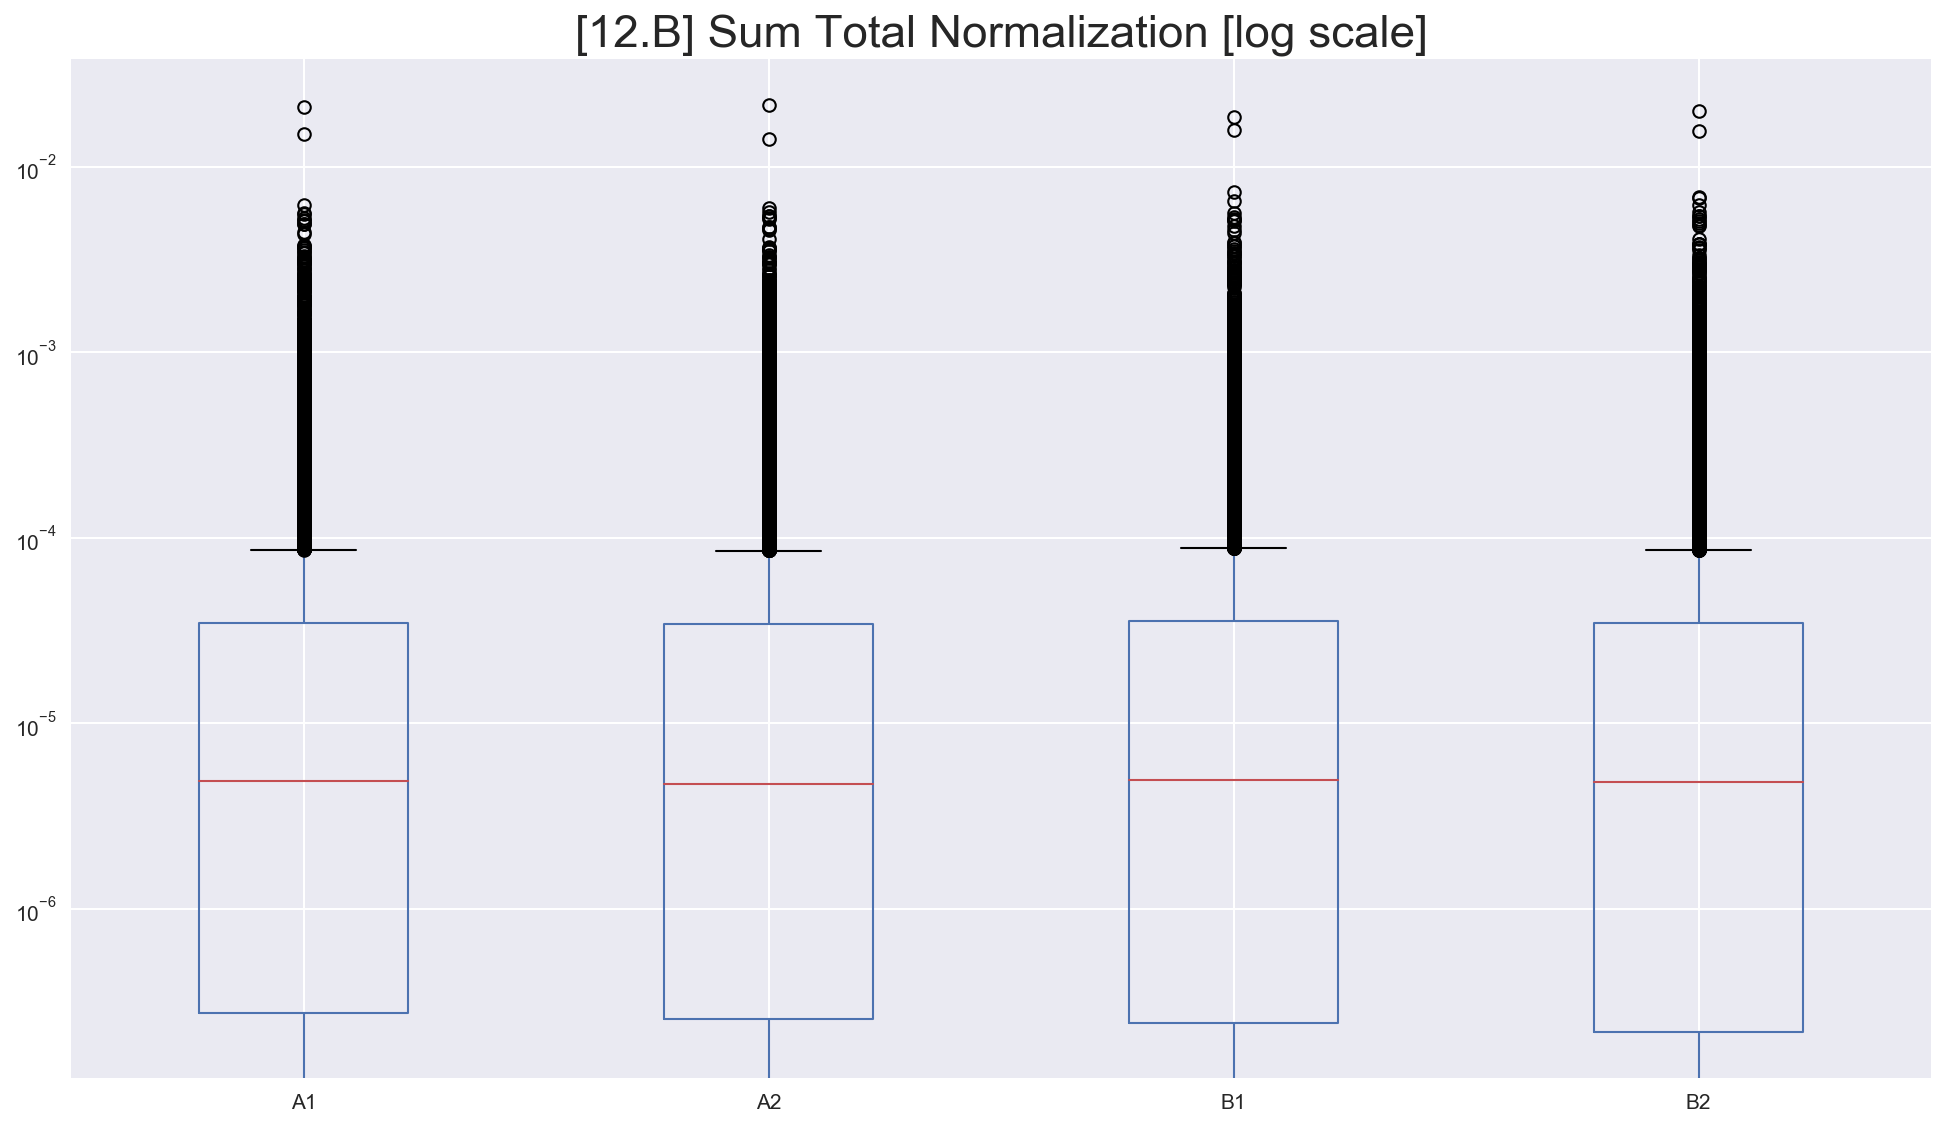

In [4]:
scale = "log"
(data12 / data12.sum()).boxplot()
plt.title("[12.B] Sum Total Normalization [log scale]", fontsize=22)
plt.yscale(scale)
plt.show()

**C** Apply the median normalization, make appropriate plots and comment on the quality and appropriateness.

In [5]:
median_norm = data12/data12.median()

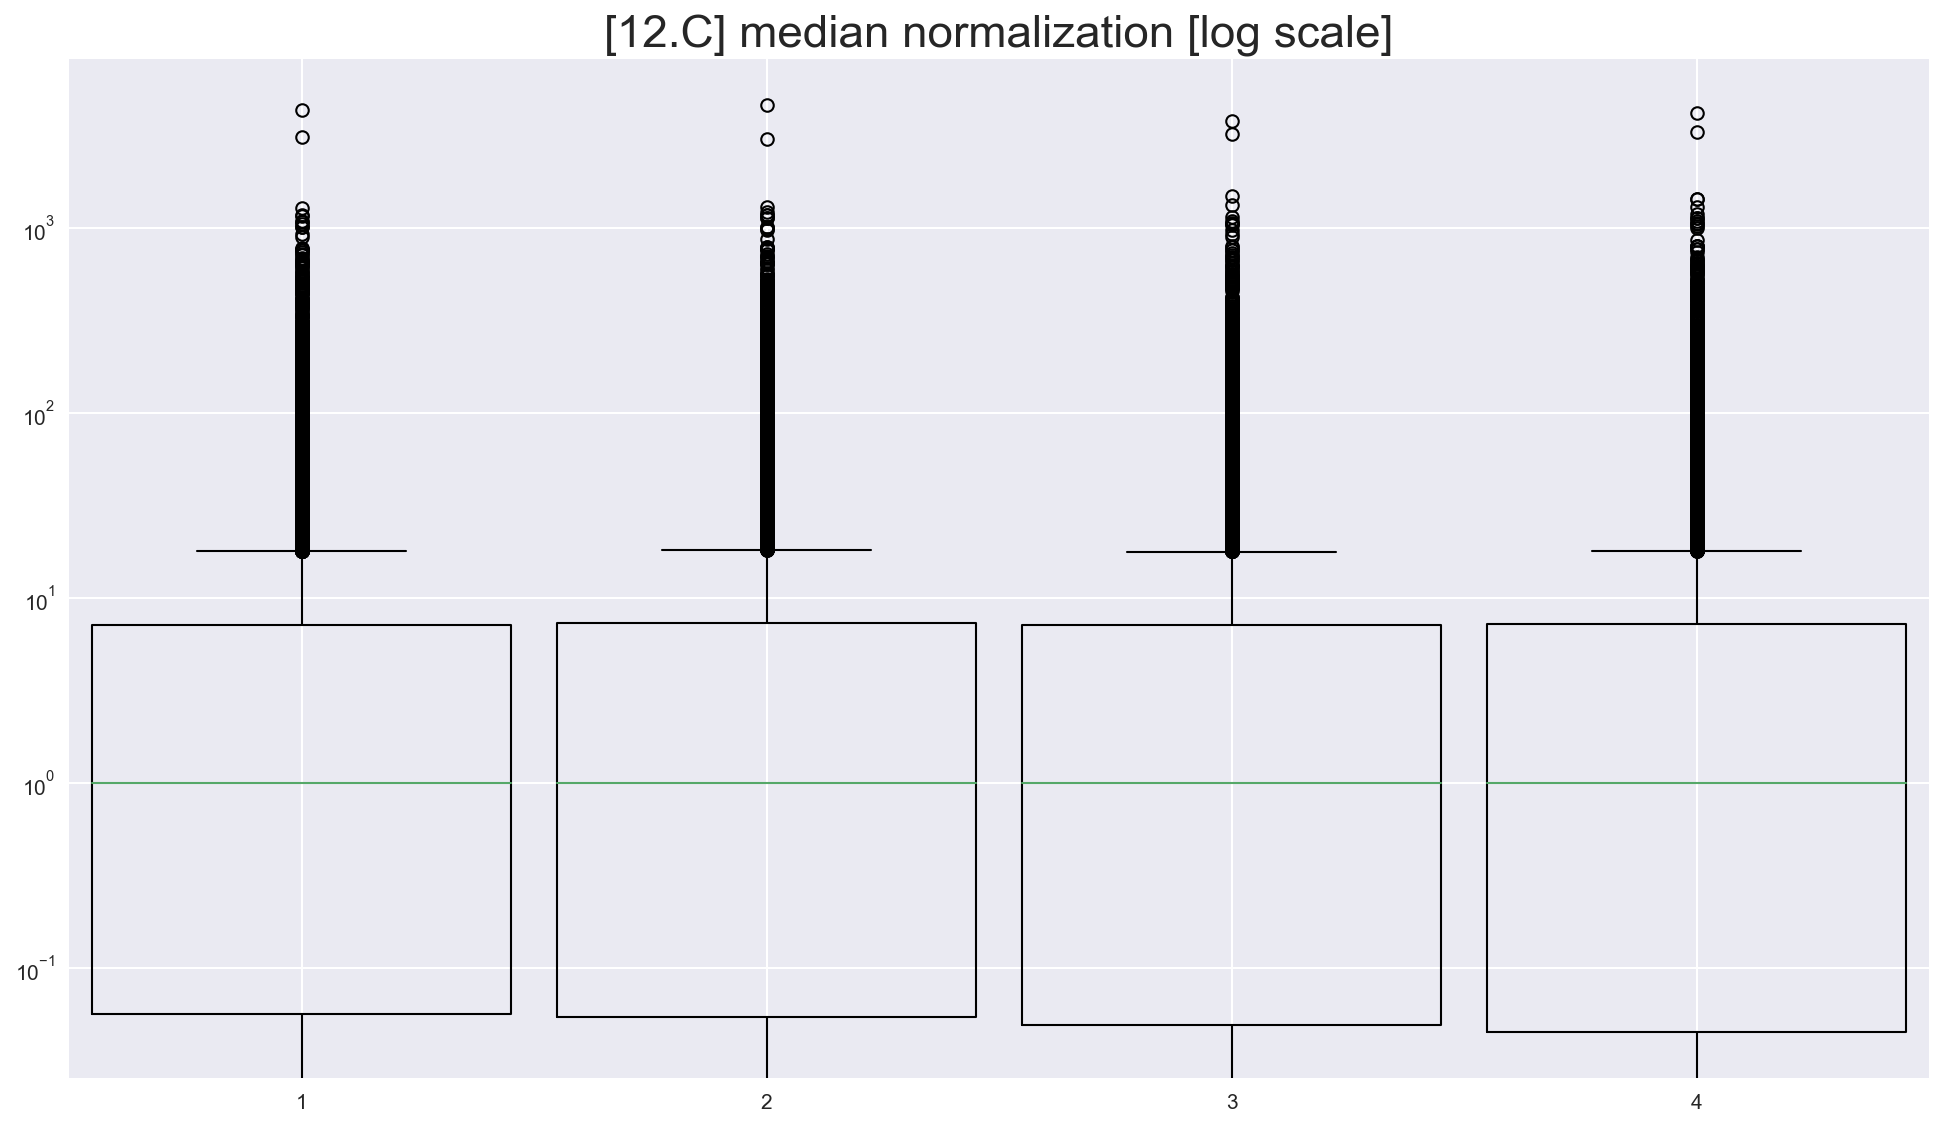

In [6]:
fig, ax = plt.subplots()
ax.set_yscale('log')
plt.boxplot([median_norm.A1, median_norm.A2, median_norm.B1, median_norm.B2], positions = [1, 2, 3, 4], widths=[0.9, 0.9, 0.9, 0.9])
plt.title("[12.C] median normalization [log scale]", fontsize=22)
plt.show()

**D** Apply the quantile normalization (recommended R library: `preprocessCore` from bioconductor, recommended R commands: `as.matrix, normalize.quantiles`), make appropriate plots and comment on the quality and appropriateness (1 point).

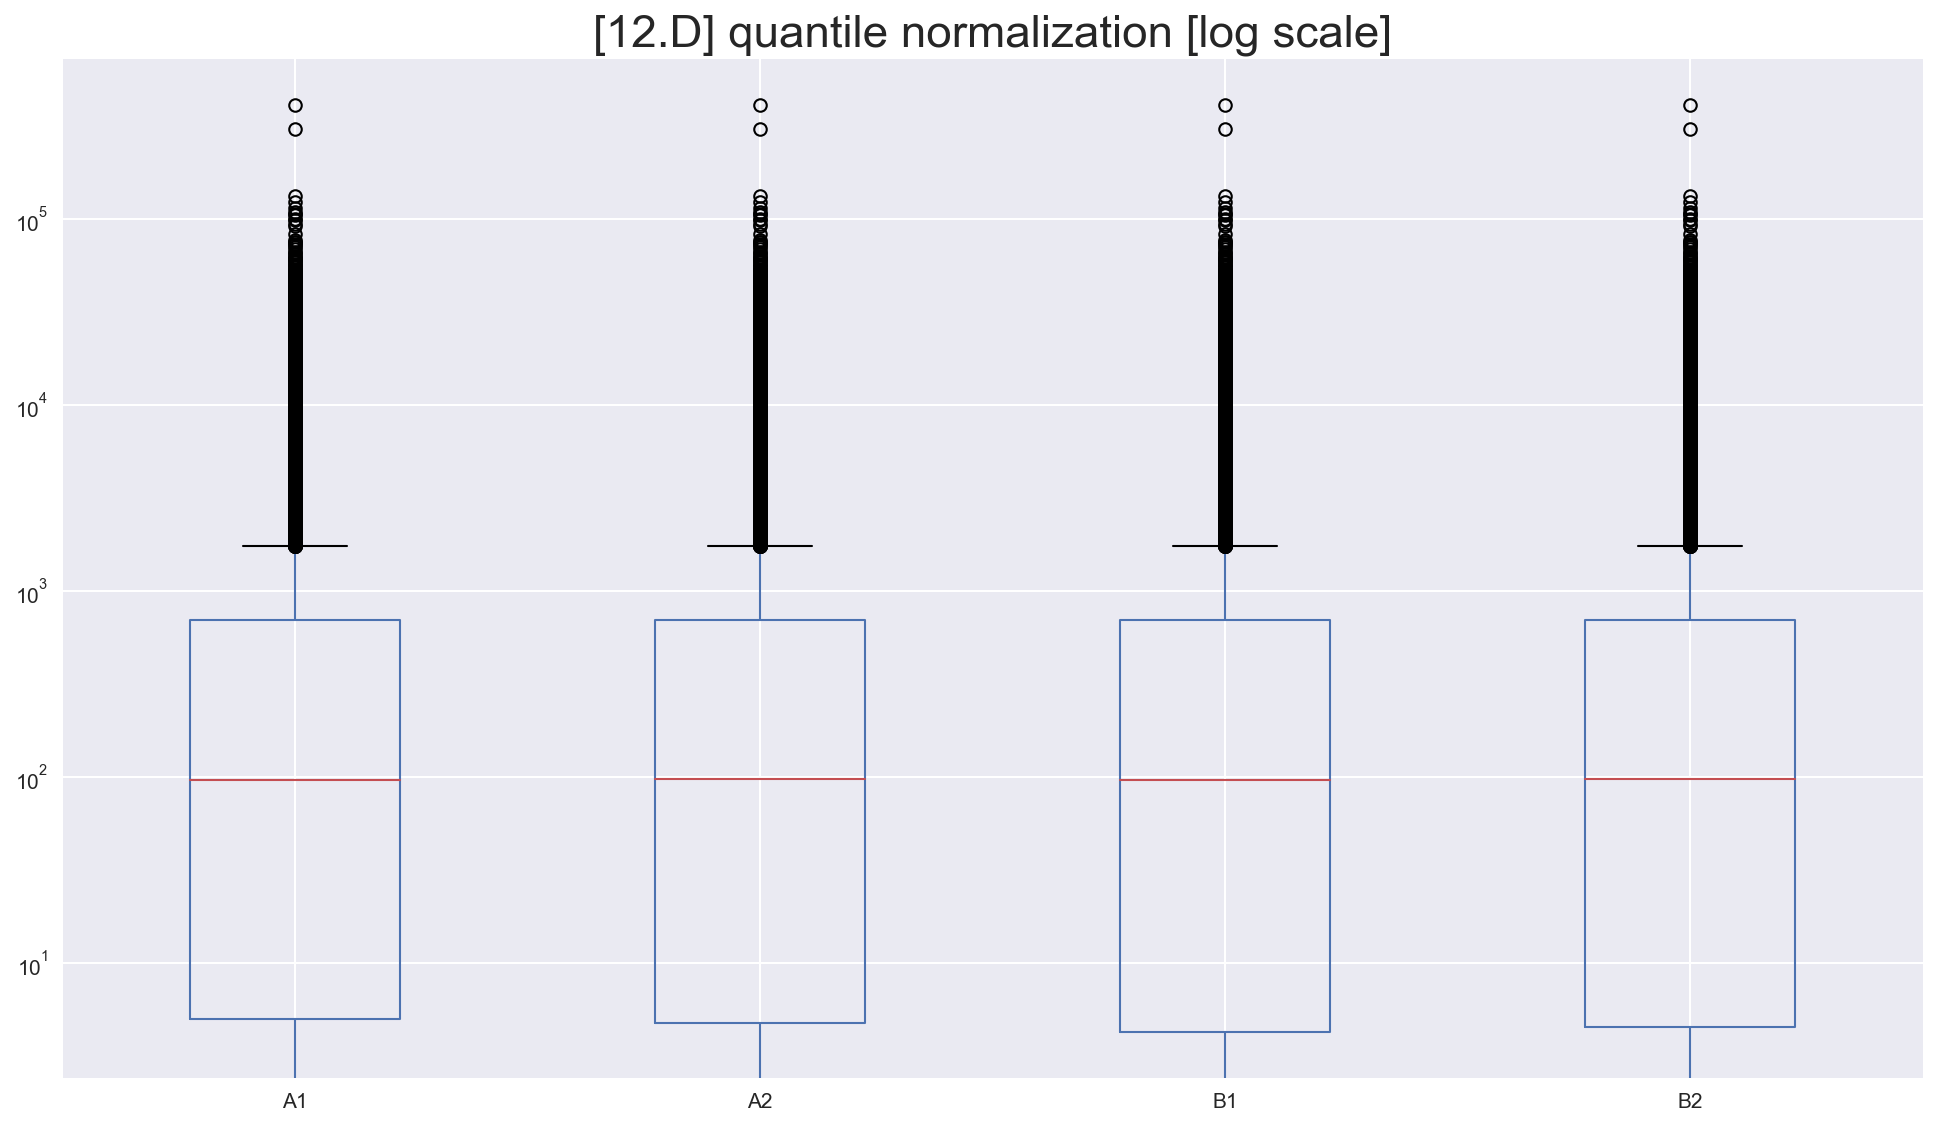

In [7]:
scale = "log"
rank_mean = data12.stack().groupby(data12.rank(method='first').stack().astype(int)).mean()
(data12.rank(method='min').stack().astype(int).map(rank_mean).unstack()).boxplot()
plt.title("[12.D] quantile normalization [log scale]", fontsize=22)
plt.yscale(scale)
plt.show()

**E** Apply the DESeq normalization (recommended R library: `DESeq` from bioconductor, recommended R commands: `newCountDataSet, estimateSizeFactors, counts`, note that you can set the condition for all repeats to ’untreated’), make appropriate plots and comment on the quality and appropriateness.

A good step by step explanation of DESeq can be found on youtube: https://www.youtube.com/watch?v=UFB993xufUU .
An other explanation can be found here: https://hbctraining.github.io/DGE_workshop/lessons/02_DGE_count_normalization.html .

In [8]:
def deseqNormalize(df_input):
    dfcalc = df_input.copy()
    geomeans = stats.gmean(df_input,axis=1)
    dfcalc['geom'] = geomeans
    for col in df_input:
        temp = df_input[col]/dfcalc.geom
        dfcalc[col] = dfcalc[col] / temp.median()
    del dfcalc['geom']
    return dfcalc

deseq = deseqNormalize(data12)

/usr/lib/python3/dist-packages/scipy/stats/stats.py:324: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


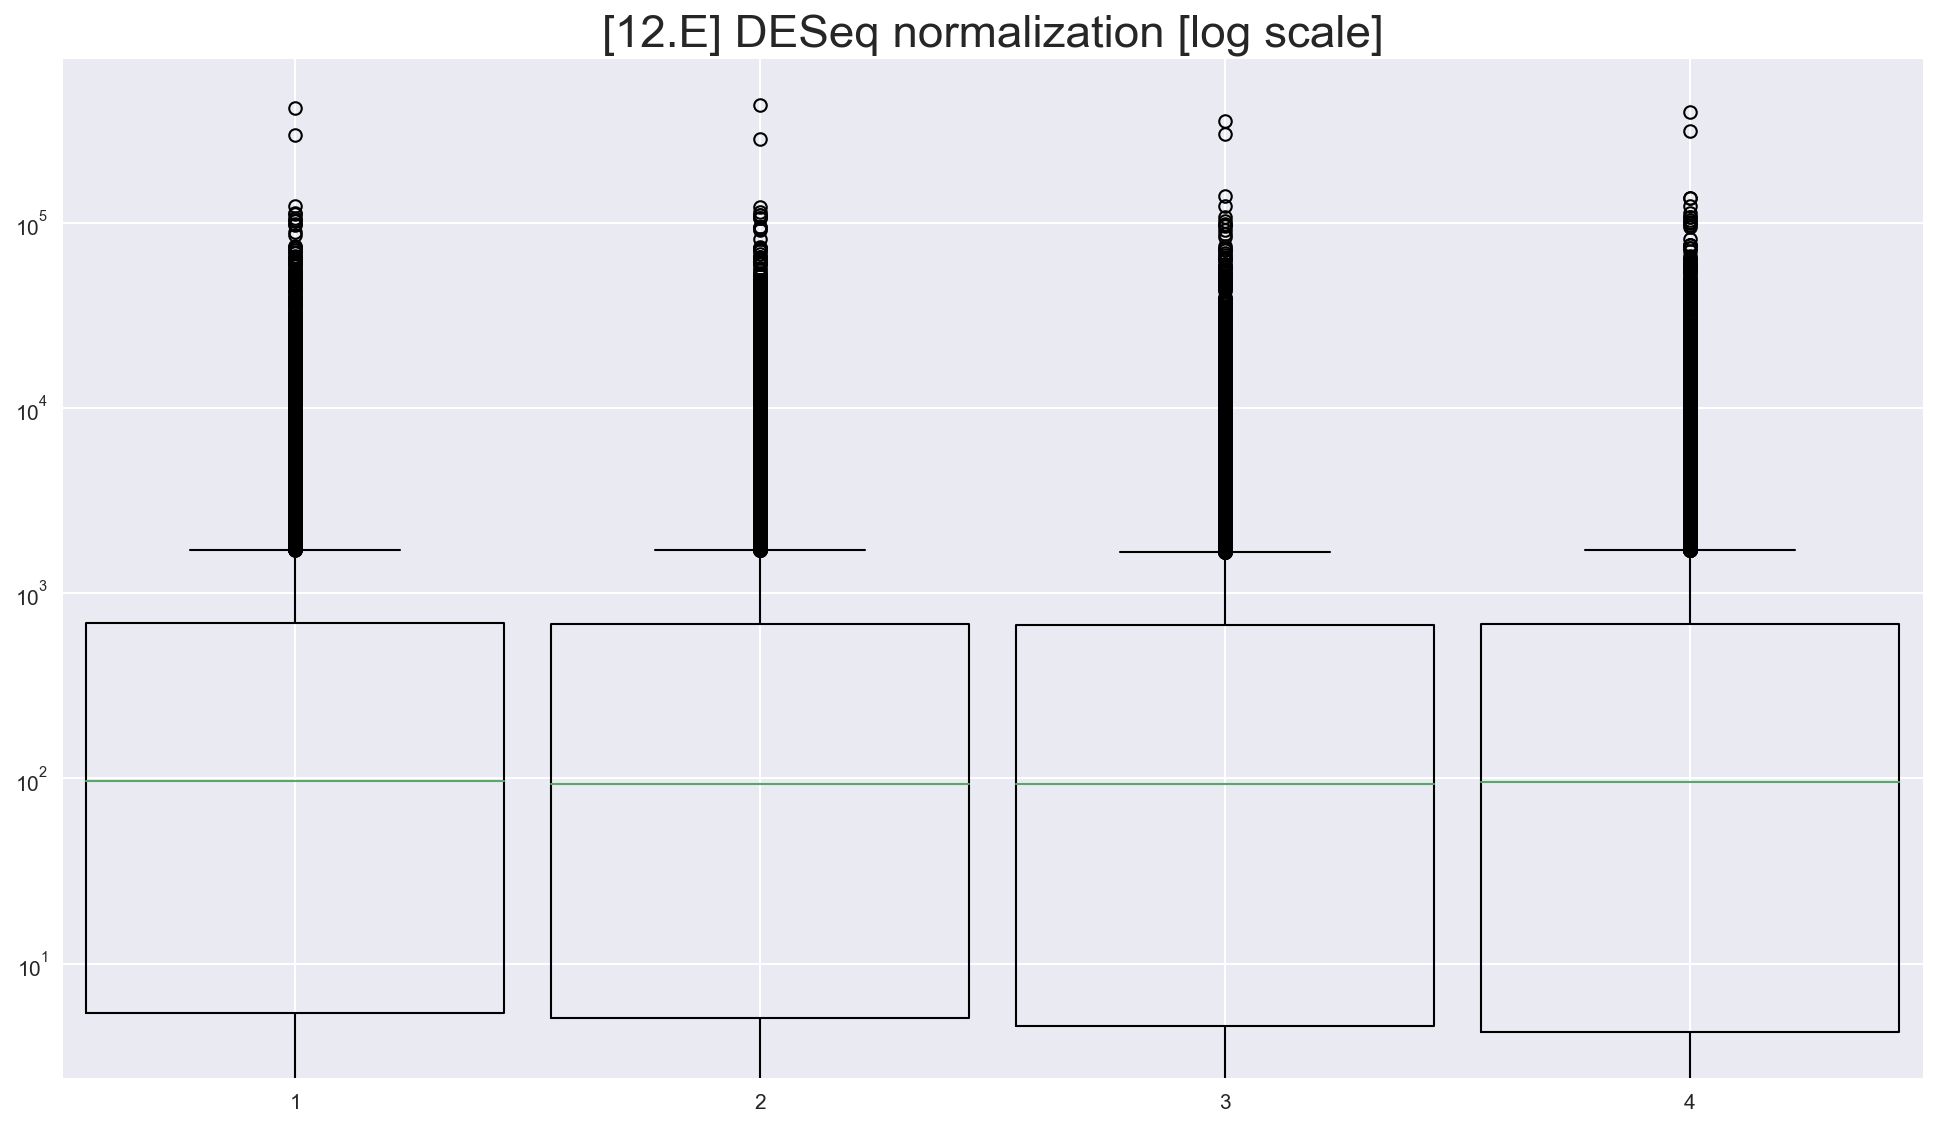

In [9]:
fig, ax = plt.subplots()
ax.set_yscale('log')
plt.boxplot([deseq.A1, deseq.A2, deseq.B1, deseq.B2], positions = [1, 2, 3, 4], widths=[0.9, 0.9, 0.9, 0.9])
plt.title("[12.E] DESeq normalization [log scale]", fontsize=22)
plt.show()

**F** Compare the results from the previous steps. Which method appears most appropriate?

All normalizations seem to do equally well. DESeq was specifically designed for gene analysis and accounts for sequencing depth and RNA composition. We would therefore chose this method. Plots of the raw data are not to different from the normalized plots. This is a good sign, since we expect to get similar results for repeated runs.